# LENET ARCHITECTURE

In [1]:
import warnings
warnings.filterwarnings('ignore')



In [2]:
import tensorflow
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation

2.14.1


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split = 0.2)
train_data=train.flow_from_directory(directory = 'DATASET/TRAIN',target_size=(224,224),
                                     batch_size=32,class_mode='categorical')

Found 1264 images belonging to 4 classes.


In [4]:
test=ImageDataGenerator(rescale=1./255)
test_data=test.flow_from_directory(directory = 'DATASET/TEST',target_size=(224,224),
                                   batch_size=32,class_mode='categorical')

Found 391 images belonging to 4 classes.


In [5]:
MODEL=Sequential()
MODEL.add(Convolution2D(filters=32, kernel_size=(3,3), strides=(3,3), input_shape=(224,224,3), padding=('valid'), activation='relu'))
MODEL.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
MODEL.add(Convolution2D(filters=128, kernel_size=(3,3), strides=(3,3), padding=('valid'), activation='relu'))
MODEL.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
MODEL.add(Flatten())
MODEL.add(Dense(256, activation='relu'))
MODEL.add(Dense(4, activation='softmax'))

OPT    = tensorflow.keras.optimizers.Adam(0.001)

MODEL.compile(optimizer=OPT,loss='categorical_crossentropy',metrics=["accuracy", tensorflow.keras.metrics.Precision(), tensorflow.keras.metrics.Recall()])
MODEL.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 74, 74, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 37, 37, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 256)               1

In [6]:
model_path = "LENET.h5"

from tensorflow.keras.callbacks import ModelCheckpoint

M = ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True, mode='max')

In [7]:
epochs = 100
batch_size = 32

In [8]:
WORKING = MODEL.fit_generator(
           train_data, steps_per_epoch=train_data.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_data,validation_steps=test_data.samples // batch_size,
           callbacks=[M])

Epoch 1/100
19/19 [==============================] - ETA: 0s - loss: 1.4328 - accuracy: 0.2599 - precision: 0.2812 - recall: 0.0148
Epoch 1: accuracy improved from -inf to 0.25987, saving model to LENET.h5
19/19 [==============================] - 15s 722ms/step - loss: 1.4328 - accuracy: 0.2599 - precision: 0.2812 - recall: 0.0148 - val_loss: 1.3662 - val_accuracy: 0.2812 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
19/19 [==============================] - ETA: 0s - loss: 1.3558 - accuracy: 0.3043 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2: accuracy improved from 0.25987 to 0.30428, saving model to LENET.h5
19/19 [==============================] - 14s 728ms/step - loss: 1.3558 - accuracy: 0.3043 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.3289 - val_accuracy: 0.2344 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
19/19 [==============================] - ETA: 0s - loss: 1.3157 - accuracy: 0.4037 - precision: 1.0000 - recall: 

In [9]:
WORKING.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

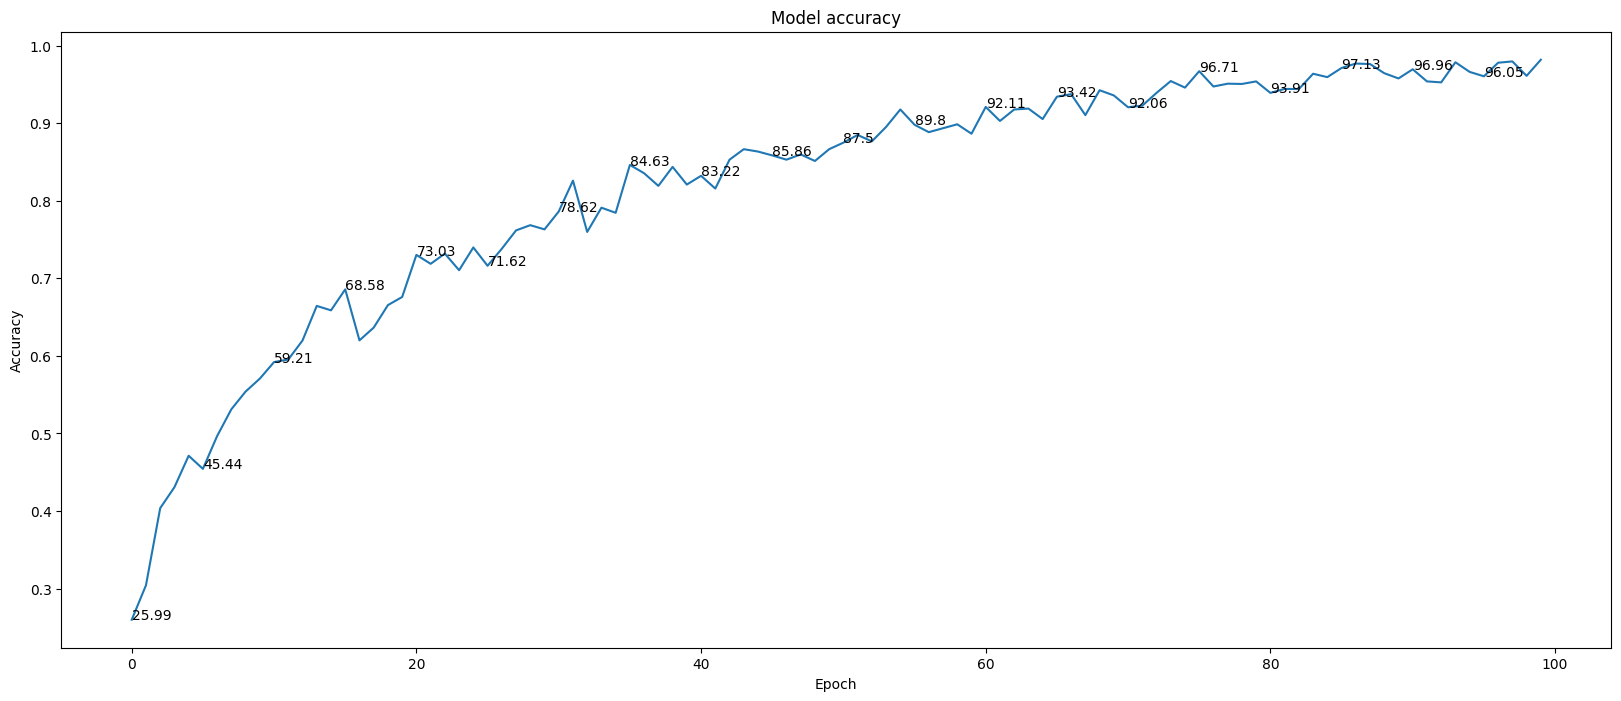

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 8))
plt.plot(WORKING.history['accuracy'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(WORKING.history['accuracy'][i]*100,2),xy=(i,WORKING.history['accuracy'][i]))

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

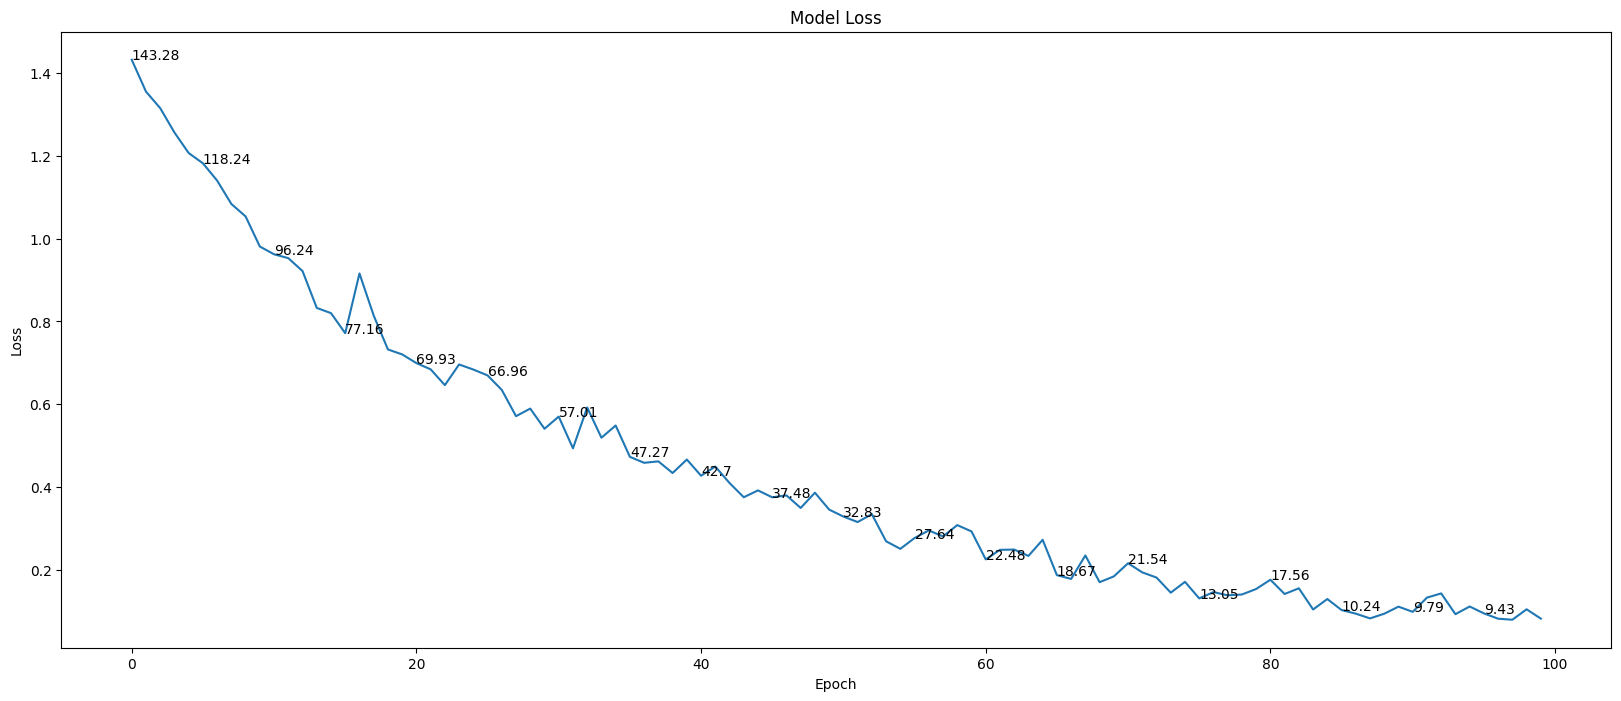

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.plot(WORKING.history['loss'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(WORKING.history['loss'][i]*100,2),xy=(i,WORKING.history['loss'][i]))

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()